# Data exploration UCF-Crime Annotated Dataset

### Imports

In [1]:
import json
import os
from os.path import join as join
import collections
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### Data preparation

Read JSON

In [2]:
annotation_path = '/media/pablo/358690d7-e500-45fb-b8f8-bc48c6be13e3/Surveillance-Video-Understanding/UCF Annotation/json'

In [3]:
def read_json(json_file:str) -> dict:
    with open(join(annotation_path, json_file), 'rb') as fp:
        data = json.load(fp)
    return data

In [4]:
train_set = read_json('UCFCrime_Train.json')
val_set = read_json('UCFCrime_Val.json')
test_set = read_json('UCFCrime_Test.json')

Get JSON as Dataframes

In [5]:
train_df = pd.DataFrame(train_set).transpose()
train_df['video'] = train_df.index
train_df = train_df.reset_index(drop=True)
val_df = pd.DataFrame(val_set).transpose()
val_df['video'] = val_df.index
val_df = val_df.reset_index(drop=True)
test_df = pd.DataFrame(test_set).transpose()
test_df['video'] = test_df.index
test_df = test_df.reset_index(drop=True)

dataframes_list = [train_df, val_df, test_df]

Merge all three dataframes.

In [6]:
train_df['dataset'] = 'train'
val_df['dataset'] = 'val'
test_df['dataset'] = 'test'

In [7]:
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

duration                                         timestamps  \
0     91.0  [[0.0, 5.3], [7.0, 8.5], [7.2, 8.5], [8.2, 8.9...   
1    28.83  [[0.0, 2.3], [0.0, 2.3], [2.3, 3.2], [2.3, 3.3...   
2   123.32  [[0.0, 23.1], [23.1, 30.7], [30.7, 31.9], [31....   
3   559.82  [[0.0, 9.6], [9.9, 15.2], [16.6, 17.8], [17.6,...   
4    31.65  [[0.0, 3.3], [0.0, 3.3], [0.0, 3.3], [3.5, 7.5...   

                                           sentences          video dataset  
0  [A woman with short hair, slightly fat, wearin...  Abuse001_x264   train  
1  [At an intersection with smooth traffic, the g...  Abuse002_x264   train  
2  [A woman in black short-sleeves pushed an old ...  Abuse003_x264   train  
3  [Two bald policemen in black uniforms held the...  Abuse004_x264   train  
4  [The prison guard wearing black trousers and g...  Abuse005_x264   train

Create an entry for each of the sentences.

In [10]:
df = df.explode(['sentences', 'timestamps']).reset_index(drop=True)

In [11]:
df.head()

duration   timestamps                                          sentences  \
0     91.0   [0.0, 5.3]  A woman with short hair, slightly fat, wearing...   
1     91.0   [7.0, 8.5]  A man wearing a white shirt and black pants en...   
2     91.0   [7.2, 8.5]  A man wearing a black shirt and black pants en...   
3     91.0   [8.2, 8.9]  A man wearing a white shirt and black pants ap...   
4     91.0  [8.9, 11.2]  A man in black clothes approached a short-hair...   

           video dataset  
0  Abuse001_x264   train  
1  Abuse001_x264   train  
2  Abuse001_x264   train  
3  Abuse001_x264   train  
4  Abuse001_x264   train

Create "clip duration" column and rename "duration".

In [12]:
df['clip_duration'] = df['timestamps'].apply(lambda x: x[1]-x[0])

In [13]:
df = df.rename(columns={'duration': 'video_duration'})

In [14]:
df

video_duration        timestamps  \
0               91.0        [0.0, 5.3]   
1               91.0        [7.0, 8.5]   
2               91.0        [7.2, 8.5]   
3               91.0        [8.2, 8.9]   
4               91.0       [8.9, 11.2]   
...              ...               ...   
23537        1024.81    [959.8, 964.2]   
23538        1024.81    [965.4, 968.9]   
23539        1024.81    [975.9, 993.4]   
23540        1024.81   [998.1, 1009.4]   
23541        1024.81  [1010.1, 1023.7]   

                                               sentences  \
0      A woman with short hair, slightly fat, wearing...   
1      A man wearing a white shirt and black pants en...   
2      A man wearing a black shirt and black pants en...   
3      A man wearing a white shirt and black pants ap...   
4      A man in black clothes approached a short-hair...   
...                                                  ...   
23537  A car turns right and passes by, a car drives ...   
23538        Two cars, one black and one red, drive away   
23539  The camera turned around, a man stood behind a...   
23540  A group of people and two dogs are crossing th...   
23541  The camera rotates, there are two cars and a s...   

                       video dataset  clip_duration  
0              Abuse001_x264   train            5.3  
1              Abuse001_x264   train            1.5  
2              Abuse001_x264   train            1.3  
3              Abuse001_x264   train            0.7  
4              Abuse001_x264   train            2.3  
...                      ...     ...            ...  
23537  Normal_Videos638_x264    test            4.4  
23538  Normal_Videos638_x264    test            3.5  
23539  Normal_Videos638_x264    test           17.5  
23540  Normal_Videos638_x264    test           11.3  
23541  Normal_Videos638_x264    test           13.6  

[23542 rows x 6 columns]

Get the class name

In [15]:
df['class_name'] = df['video'].apply(lambda x: x[:-8])

In [16]:
df.tail(5)

video_duration        timestamps  \
23537        1024.81    [959.8, 964.2]   
23538        1024.81    [965.4, 968.9]   
23539        1024.81    [975.9, 993.4]   
23540        1024.81   [998.1, 1009.4]   
23541        1024.81  [1010.1, 1023.7]   

                                               sentences  \
23537  A car turns right and passes by, a car drives ...   
23538        Two cars, one black and one red, drive away   
23539  The camera turned around, a man stood behind a...   
23540  A group of people and two dogs are crossing th...   
23541  The camera rotates, there are two cars and a s...   

                       video dataset  clip_duration     class_name  
23537  Normal_Videos638_x264    test            4.4  Normal_Videos  
23538  Normal_Videos638_x264    test            3.5  Normal_Videos  
23539  Normal_Videos638_x264    test           17.5  Normal_Videos  
23540  Normal_Videos638_x264    test           11.3  Normal_Videos  
23541  Normal_Videos638_x264    test           13.6  Normal_Videos

In [17]:
df.groupby('class_name').count()

video_duration  timestamps  sentences  video  dataset  \
class_name                                                              
Abuse                      722         722        722    722      722   
Arrest                     616         616        616    616      616   
Arson                      267         267        267    267      267   
Assault                    270         270        270    270      270   
Burglary                  1066        1066       1066   1066     1066   
Explosion                  378         378        378    378      378   
Fighting                   676         676        676    676      676   
Normal_Videos            14421       14421      14421  14421    14421   
Normal_Videos_             774         774        774    774      774   
RoadAccidents              619         619        619    619      619   
Robbery                   1134        1134       1134   1134     1134   
Shooting                   471         471        471    471      471   
Shoplifting                767         767        767    767      767   
Stealing                   944         944        944    944      944   
Vandalism                  417         417        417    417      417   

                clip_duration  
class_name                     
Abuse                     722  
Arrest                    616  
Arson                     267  
Assault                   270  
Burglary                 1066  
Explosion                 378  
Fighting                  676  
Normal_Videos           14421  
Normal_Videos_            774  
RoadAccidents             619  
Robbery                  1134  
Shooting                  471  
Shoplifting               767  
Stealing                  944  
Vandalism                 417

It seems that we have two classes which are actually the same, 'Normal_Videos' and 'Normal_Videos_'. Let's merge them.

In [18]:
df = df.replace('Normal_Videos_', 'Normal_Videos')

df.groupby('class_name').count()

video_duration  timestamps  sentences  video  dataset  \
class_name                                                             
Abuse                     722         722        722    722      722   
Arrest                    616         616        616    616      616   
Arson                     267         267        267    267      267   
Assault                   270         270        270    270      270   
Burglary                 1066        1066       1066   1066     1066   
Explosion                 378         378        378    378      378   
Fighting                  676         676        676    676      676   
Normal_Videos           15195       15195      15195  15195    15195   
RoadAccidents             619         619        619    619      619   
Robbery                  1134        1134       1134   1134     1134   
Shooting                  471         471        471    471      471   
Shoplifting               767         767        767    767      767   
Stealing                  944         944        944    944      944   
Vandalism                 417         417        417    417      417   

               clip_duration  
class_name                    
Abuse                    722  
Arrest                   616  
Arson                    267  
Assault                  270  
Burglary                1066  
Explosion                378  
Fighting                 676  
Normal_Videos          15195  
RoadAccidents            619  
Robbery                 1134  
Shooting                 471  
Shoplifting              767  
Stealing                 944  
Vandalism                417

Let's add a column indicating wheter the annotation is part of an anomalous video or a normal video (take into account that a 'normal' annotation can also belong to a abnormal video, but not the contrary).

In [19]:
df['anomaly'] = df['class_name'].apply(lambda x: False if x == 'Normal_Videos' else True)

df

video_duration        timestamps  \
0               91.0        [0.0, 5.3]   
1               91.0        [7.0, 8.5]   
2               91.0        [7.2, 8.5]   
3               91.0        [8.2, 8.9]   
4               91.0       [8.9, 11.2]   
...              ...               ...   
23537        1024.81    [959.8, 964.2]   
23538        1024.81    [965.4, 968.9]   
23539        1024.81    [975.9, 993.4]   
23540        1024.81   [998.1, 1009.4]   
23541        1024.81  [1010.1, 1023.7]   

                                               sentences  \
0      A woman with short hair, slightly fat, wearing...   
1      A man wearing a white shirt and black pants en...   
2      A man wearing a black shirt and black pants en...   
3      A man wearing a white shirt and black pants ap...   
4      A man in black clothes approached a short-hair...   
...                                                  ...   
23537  A car turns right and passes by, a car drives ...   
23538        Two cars, one black and one red, drive away   
23539  The camera turned around, a man stood behind a...   
23540  A group of people and two dogs are crossing th...   
23541  The camera rotates, there are two cars and a s...   

                       video dataset  clip_duration     class_name  anomaly  
0              Abuse001_x264   train            5.3          Abuse     True  
1              Abuse001_x264   train            1.5          Abuse     True  
2              Abuse001_x264   train            1.3          Abuse     True  
3              Abuse001_x264   train            0.7          Abuse     True  
4              Abuse001_x264   train            2.3          Abuse     True  
...                      ...     ...            ...            ...      ...  
23537  Normal_Videos638_x264    test            4.4  Normal_Videos    False  
23538  Normal_Videos638_x264    test            3.5  Normal_Videos    False  
23539  Normal_Videos638_x264    test           17.5  Normal_Videos    False  
23540  Normal_Videos638_x264    test           11.3  Normal_Videos    False  
23541  Normal_Videos638_x264    test           13.6  Normal_Videos    False  

[23542 rows x 8 columns]

Also, add a column for sentence length.

In [20]:
df['sentence_length'] = df['sentences'].apply(lambda x: len(x))

df

video_duration        timestamps  \
0               91.0        [0.0, 5.3]   
1               91.0        [7.0, 8.5]   
2               91.0        [7.2, 8.5]   
3               91.0        [8.2, 8.9]   
4               91.0       [8.9, 11.2]   
...              ...               ...   
23537        1024.81    [959.8, 964.2]   
23538        1024.81    [965.4, 968.9]   
23539        1024.81    [975.9, 993.4]   
23540        1024.81   [998.1, 1009.4]   
23541        1024.81  [1010.1, 1023.7]   

                                               sentences  \
0      A woman with short hair, slightly fat, wearing...   
1      A man wearing a white shirt and black pants en...   
2      A man wearing a black shirt and black pants en...   
3      A man wearing a white shirt and black pants ap...   
4      A man in black clothes approached a short-hair...   
...                                                  ...   
23537  A car turns right and passes by, a car drives ...   
23538        Two cars, one black and one red, drive away   
23539  The camera turned around, a man stood behind a...   
23540  A group of people and two dogs are crossing th...   
23541  The camera rotates, there are two cars and a s...   

                       video dataset  clip_duration     class_name  anomaly  \
0              Abuse001_x264   train            5.3          Abuse     True   
1              Abuse001_x264   train            1.5          Abuse     True   
2              Abuse001_x264   train            1.3          Abuse     True   
3              Abuse001_x264   train            0.7          Abuse     True   
4              Abuse001_x264   train            2.3          Abuse     True   
...                      ...     ...            ...            ...      ...   
23537  Normal_Videos638_x264    test            4.4  Normal_Videos    False   
23538  Normal_Videos638_x264    test            3.5  Normal_Videos    False   
23539  Normal_Videos638_x264    test           17.5  Normal_Videos    False   
23540  Normal_Videos638_x264    test           11.3  Normal_Videos    False   
23541  Normal_Videos638_x264    test           13.6  Normal_Videos    False   

       sentence_length  
0                  158  
1                  144  
2                  144  
3                  275  
4                  185  
...                ...  
23537               73  
23538               44  
23539               93  
23540              114  
23541              122  

[23542 rows x 9 columns]

Finally, let's rename columns so they are all in singular.

In [21]:
df = df.rename(columns={'timestamps':'timestamp', 'sentences':'sentence'})

df

video_duration         timestamp  \
0               91.0        [0.0, 5.3]   
1               91.0        [7.0, 8.5]   
2               91.0        [7.2, 8.5]   
3               91.0        [8.2, 8.9]   
4               91.0       [8.9, 11.2]   
...              ...               ...   
23537        1024.81    [959.8, 964.2]   
23538        1024.81    [965.4, 968.9]   
23539        1024.81    [975.9, 993.4]   
23540        1024.81   [998.1, 1009.4]   
23541        1024.81  [1010.1, 1023.7]   

                                                sentence  \
0      A woman with short hair, slightly fat, wearing...   
1      A man wearing a white shirt and black pants en...   
2      A man wearing a black shirt and black pants en...   
3      A man wearing a white shirt and black pants ap...   
4      A man in black clothes approached a short-hair...   
...                                                  ...   
23537  A car turns right and passes by, a car drives ...   
23538        Two cars, one black and one red, drive away   
23539  The camera turned around, a man stood behind a...   
23540  A group of people and two dogs are crossing th...   
23541  The camera rotates, there are two cars and a s...   

                       video dataset  clip_duration     class_name  anomaly  \
0              Abuse001_x264   train            5.3          Abuse     True   
1              Abuse001_x264   train            1.5          Abuse     True   
2              Abuse001_x264   train            1.3          Abuse     True   
3              Abuse001_x264   train            0.7          Abuse     True   
4              Abuse001_x264   train            2.3          Abuse     True   
...                      ...     ...            ...            ...      ...   
23537  Normal_Videos638_x264    test            4.4  Normal_Videos    False   
23538  Normal_Videos638_x264    test            3.5  Normal_Videos    False   
23539  Normal_Videos638_x264    test           17.5  Normal_Videos    False   
23540  Normal_Videos638_x264    test           11.3  Normal_Videos    False   
23541  Normal_Videos638_x264    test           13.6  Normal_Videos    False   

       sentence_length  
0                  158  
1                  144  
2                  144  
3                  275  
4                  185  
...                ...  
23537               73  
23538               44  
23539               93  
23540              114  
23541              122  

[23542 rows x 9 columns]

### Exploratory Data Analysis

To have an idea of the dataset, let's see the number of annotations we are working with.

In [22]:
len(df)

23542

Let's first start by describing the numeric data.

In [23]:
df.describe()

clip_duration  sentence_length
count   23542.000000     23542.000000
mean       16.921341        96.115623
std        34.513602        51.148542
min         0.100000         5.000000
25%         6.100000        59.000000
50%        11.100000        87.000000
75%        20.300000       121.000000
max      3599.300000       667.000000

We can explore clip_duration first.

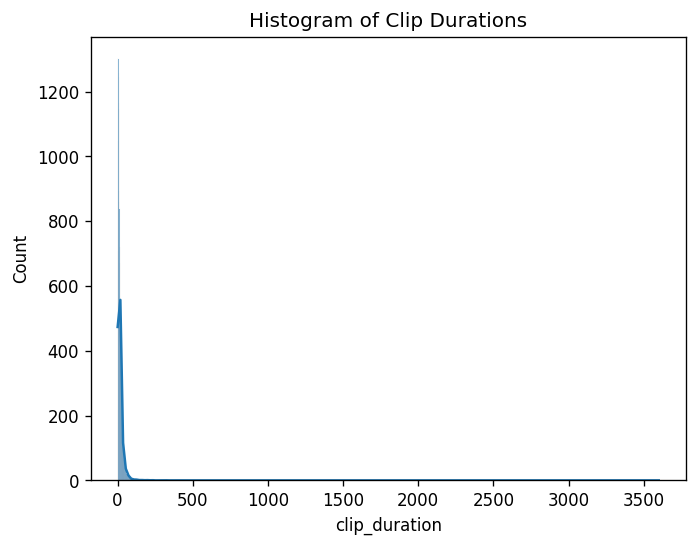

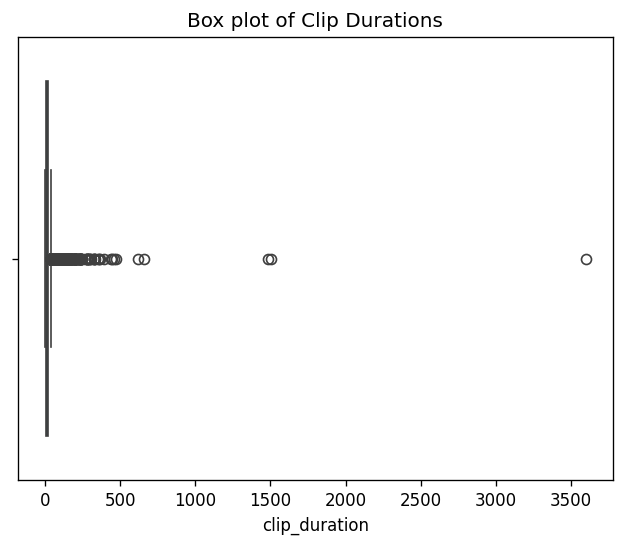

In [24]:
plt.figure(dpi=120)
sns.histplot(df.clip_duration, kde=True)
plt.title('Histogram of Clip Durations')
plt.show()

plt.figure(dpi=120)
sns.boxplot(x=df.clip_duration)
plt.title('Box plot of Clip Durations')
plt.show()

So, regarding "clip_duration" we have quite huge outliers. Let's check them.

First, we want to find if there is invalid data, that is, if for some annotation 'clip_duration' is higher than the video duration, which is impossible.

In [25]:
df[df['clip_duration'] > df['video_duration']]

Empty DataFrame
Columns: [video_duration, timestamp, sentence, video, dataset, clip_duration, class_name, anomaly, sentence_length]
Index: []

There is no invalid data. Let's check the largest clips then.

In [26]:
df[df['clip_duration'] > 1000]

video_duration        timestamp  \
8277         3563.73    [0.0, 1505.3]   
14719        1656.83  [172.1, 1656.0]   
16966        3599.84    [0.0, 3599.3]   

                                                sentence  \
8277   There is a row of trees on the left side of a ...   
14719               Several vehicles passing by the road   
16966  The camera is facing a square, and people are ...   

                        video dataset  clip_duration     class_name  anomaly  \
8277    Normal_Videos137_x264   train         1505.3  Normal_Videos    False   
14719   Normal_Videos492_x264   train         1483.9  Normal_Videos    False   
16966  Normal_Videos_935_x264     val         3599.3  Normal_Videos    False   

       sentence_length  
8277               357  
14719               36  
16966               86

Although there are huge outliers, it seems that there is nothing wrong with them, so let's leave them in the dataset for now.

Let's check now sentence duration.

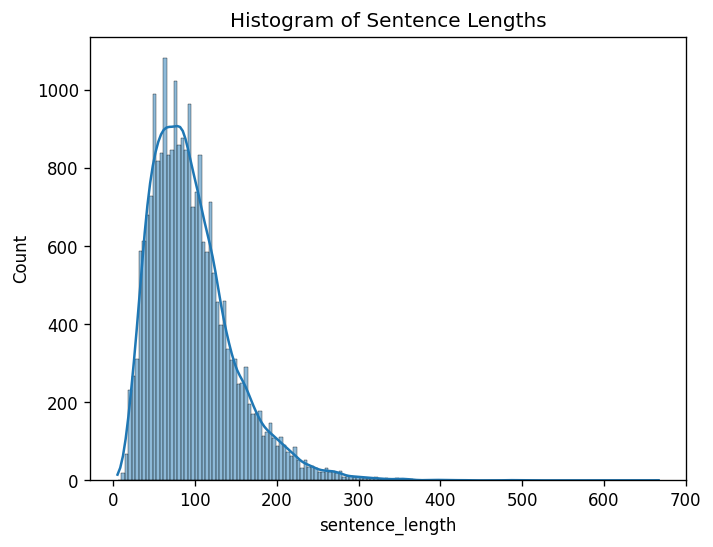

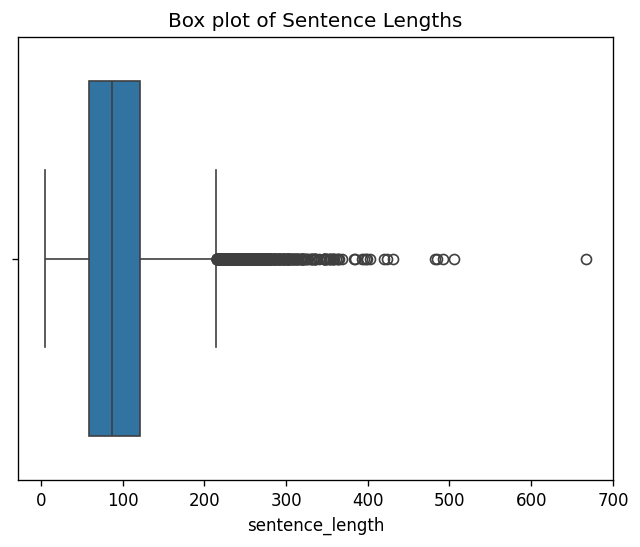

In [27]:
plt.figure(dpi=120)
sns.histplot(df.sentence_length, kde=True)
plt.title('Histogram of Sentence Lengths')
plt.show()

plt.figure(dpi=120)
sns.boxplot(x=df.sentence_length)
plt.title('Box plot of Sentence Lengths')
plt.show()

In [28]:
df[df['sentence_length'] > 500]

video_duration     timestamp  \
482          94.41  [31.9, 40.6]   
486          94.41  [66.0, 75.6]   

                                              sentence          video dataset  \
482  The old woman was eating food and suddenly sto...  Abuse033_x264   train   
486  The nanny and the old lady pointed at each oth...  Abuse033_x264   train   

     clip_duration class_name  anomaly  sentence_length  
482            8.7      Abuse     True              506  
486            9.6      Abuse     True              667

Now, let's check the number of videos per category.

In [29]:
df.groupby('class_name')['video'].nunique()

class_name
Abuse             50
Arrest            50
Arson             50
Assault           48
Burglary         100
Explosion         50
Fighting          50
Normal_Videos    910
RoadAccidents    148
Robbery          149
Shooting          50
Shoplifting       50
Stealing         100
Vandalism         49
Name: video, dtype: int64

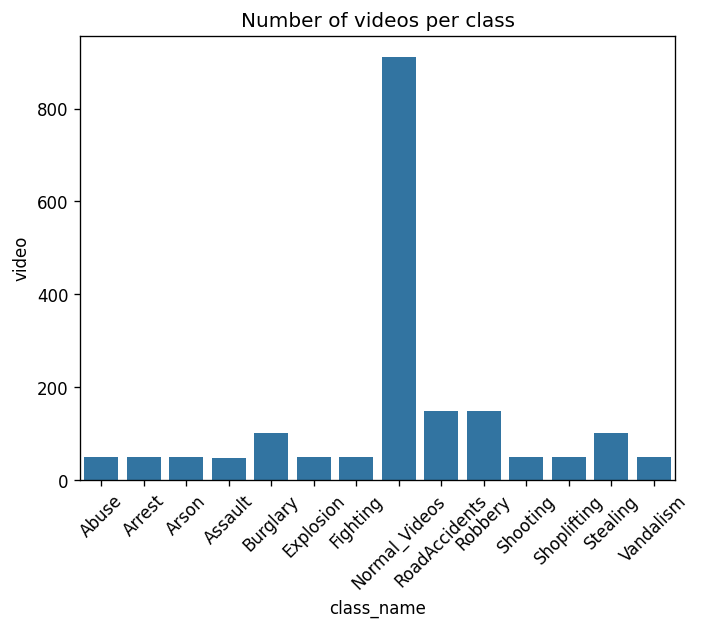

In [30]:
def plot_bars(data, title, rotation=45):
    plt.figure(dpi=120)
    sns.barplot(data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.show()

plot_bars(data=df.groupby('class_name')['video'].nunique(), title='Number of videos per class')

There is a lot of normal videos. Let's see the barplot without this category.

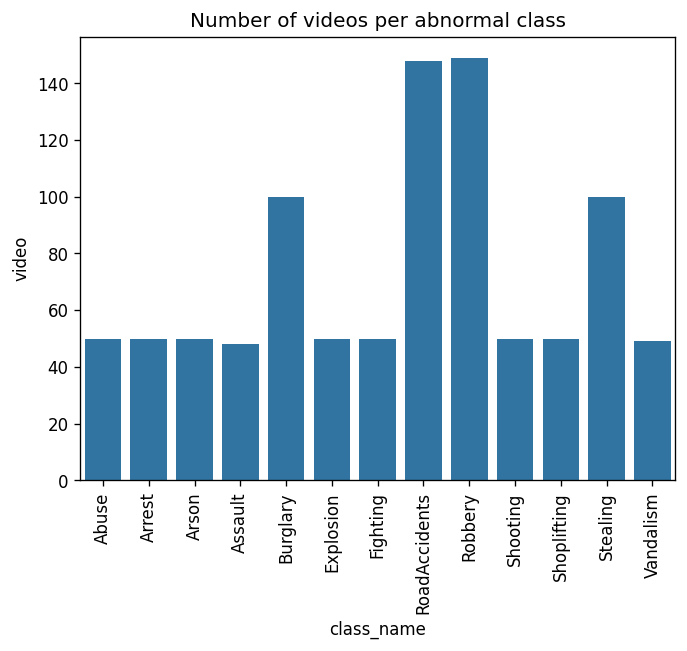

In [31]:
plot_bars(data=df[df['class_name'] != 'Normal_Videos'].groupby('class_name')['video'].nunique(),
          title='Number of videos per abnormal class',
          rotation=90)

For most classes there is a balance. Neverthelesws, the important thing here are the clips, not the videos. So let's check clip duration per category.

In [32]:
df.groupby('class_name').sum()['clip_duration']

class_name
Abuse              5651.8
Arrest            12856.9
Arson              3738.7
Assault            3503.6
Burglary          12080.1
Explosion         11864.3
Fighting           8511.0
Normal_Videos    288007.8
RoadAccidents      9073.9
Robbery           11420.4
Shooting           4782.7
Shoplifting       10394.4
Stealing          12362.5
Vandalism          4114.1
Name: clip_duration, dtype: float64

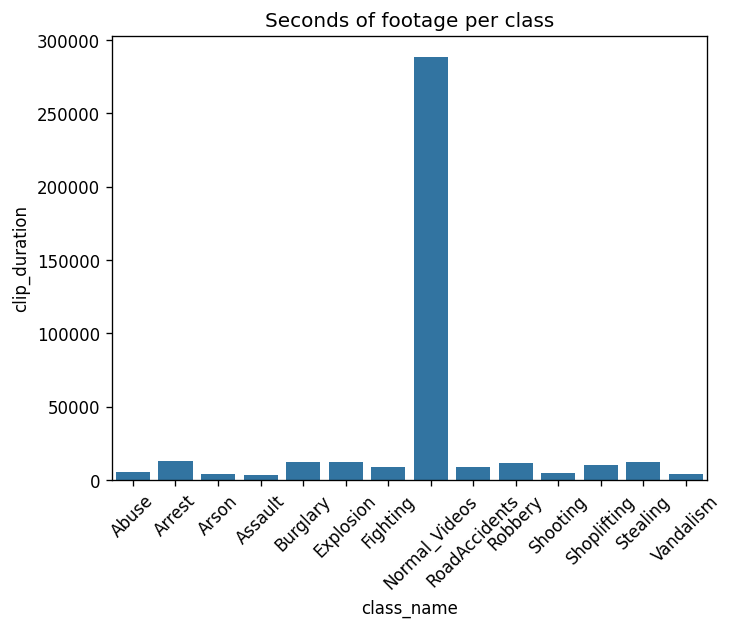

In [33]:
plot_bars(data=df.groupby('class_name').sum()['clip_duration'], title='Seconds of footage per class')

We have a lot of footage of normal videos.

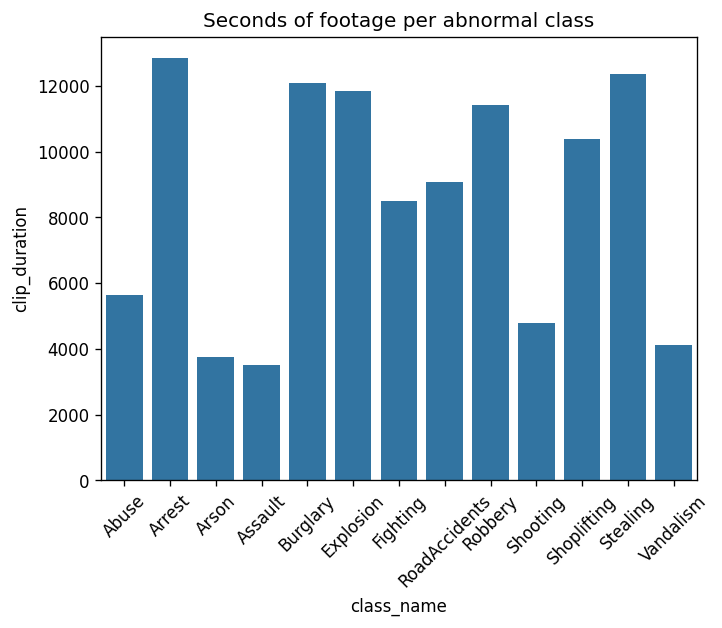

In [34]:
plot_bars(data=df[df['class_name'] != 'Normal_Videos'].groupby('class_name').sum()['clip_duration'],
          title='Seconds of footage per abnormal class')

We also have a lot of footage per every class, although some classes like assault, arson and shooting have lesser seconds. Maybe the could be because of the nature of the action (a shooting happens in an instant), whereas other categories, like burglary, take more time to be performed.

Now, let's see the number of entries per category.

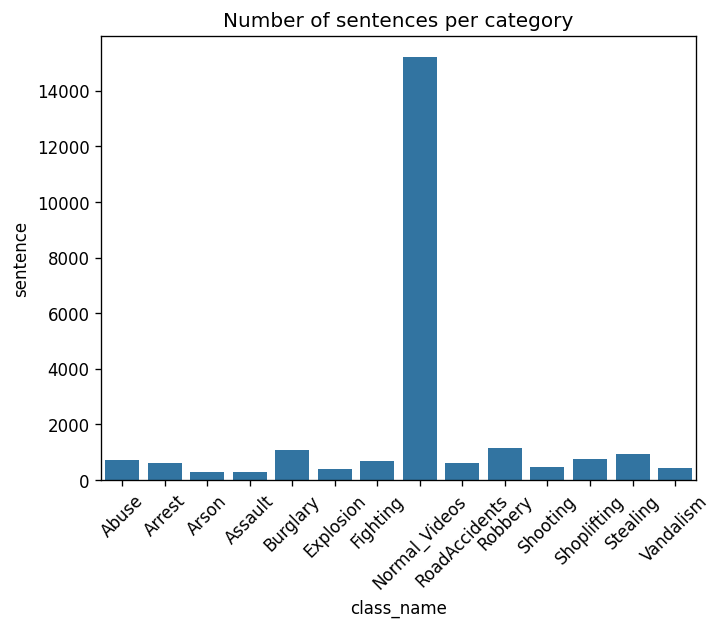

In [35]:
plot_bars(data=df.groupby('class_name').count()['sentence'], title='Number of sentences per category')

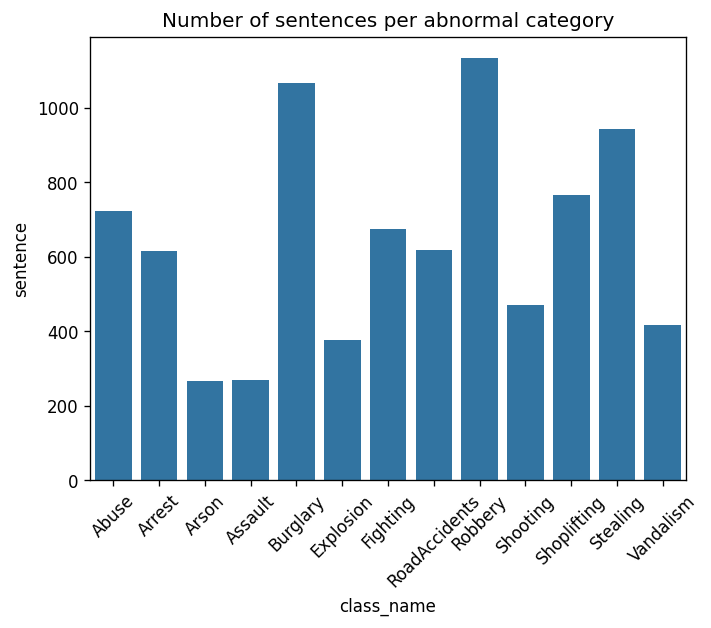

In [36]:
plot_bars(data=df[df['class_name'] != 'Normal_Videos'].groupby('class_name').count()['sentence'],
          title='Number of sentences per abnormal category')

Now let's plot the average clip duration per class.

In [37]:
df.groupby('class_name').sum()['clip_duration']

class_name
Abuse              5651.8
Arrest            12856.9
Arson              3738.7
Assault            3503.6
Burglary          12080.1
Explosion         11864.3
Fighting           8511.0
Normal_Videos    288007.8
RoadAccidents      9073.9
Robbery           11420.4
Shooting           4782.7
Shoplifting       10394.4
Stealing          12362.5
Vandalism          4114.1
Name: clip_duration, dtype: float64

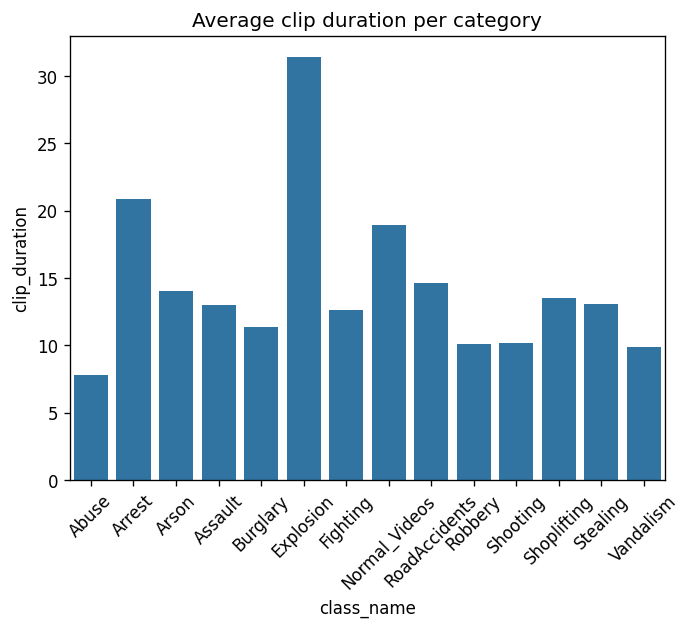

In [38]:
avg_clip_data = df.groupby('class_name').sum()['clip_duration']/df.groupby('class_name').count()['clip_duration']

plot_bars(data=avg_clip_data, title='Average clip duration per category')

Let's plot more complex graphs for the clip's duration attribute.

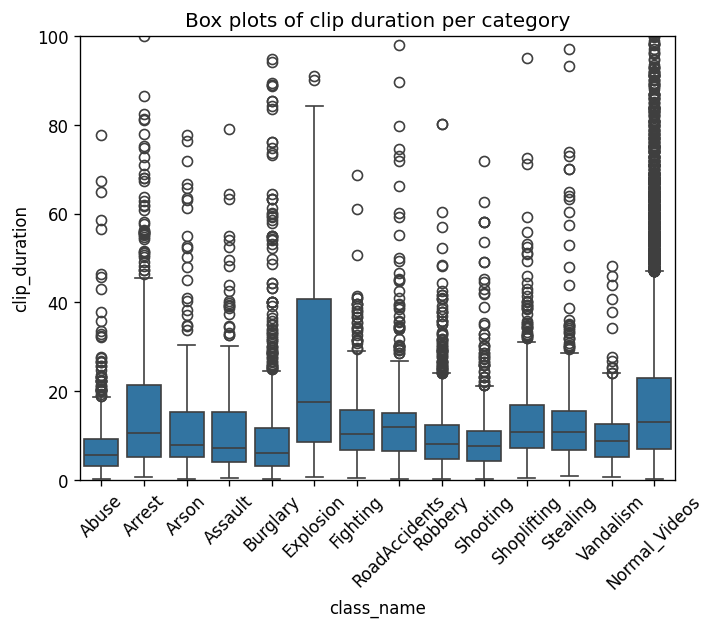

In [39]:
def plot_boxes(x, y, data, title, y_lim=100, rotation=45):
    plt.figure(dpi=120)
    sns.boxplot(x=x, y=y, data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.ylim([0, y_lim])
    plt.show()

plot_boxes(x='class_name', y='clip_duration', data=df, title='Box plots of clip duration per category', y_lim=100)

We can see that 'Explosion' category has bigger variance than the rest of the categories.

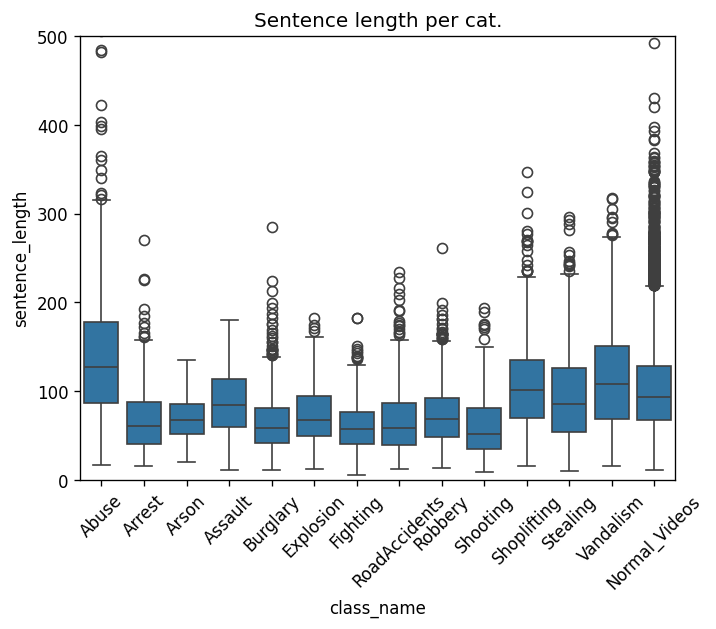

In [40]:
plot_boxes(x='class_name', y='sentence_length', data=df, title='Sentence length per cat.', y_lim=500)

Now, let's do the same thing but instead of using categories, let's use only if it is a normal or abnormal video.

In [45]:
df.groupby('anomaly')['video'].nunique()

anomaly
False    910
True     944
Name: video, dtype: int64

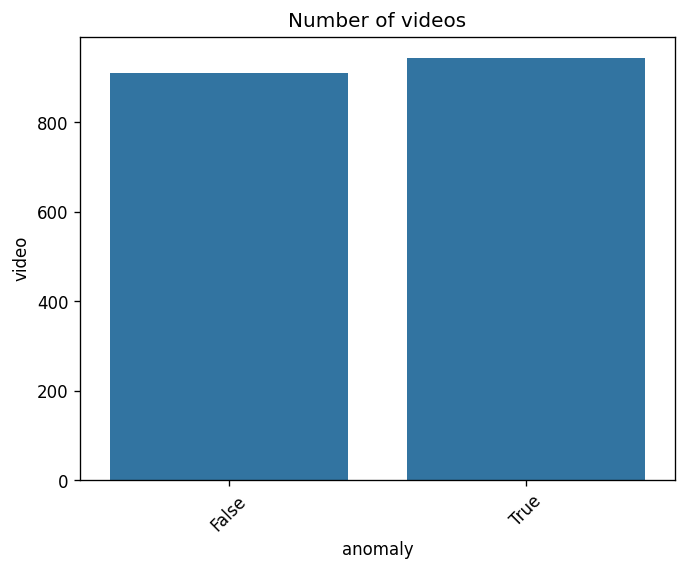

In [43]:
plot_bars(data=df.groupby('anomaly')['video'].nunique(), title='Number of videos')

In [44]:
df.groupby('anomaly').sum()['clip_duration']

class_name
Abuse              5651.8
Arrest            12856.9
Arson              3738.7
Assault            3503.6
Burglary          12080.1
Explosion         11864.3
Fighting           8511.0
Normal_Videos    288007.8
RoadAccidents      9073.9
Robbery           11420.4
Shooting           4782.7
Shoplifting       10394.4
Stealing          12362.5
Vandalism          4114.1
Name: clip_duration, dtype: float64

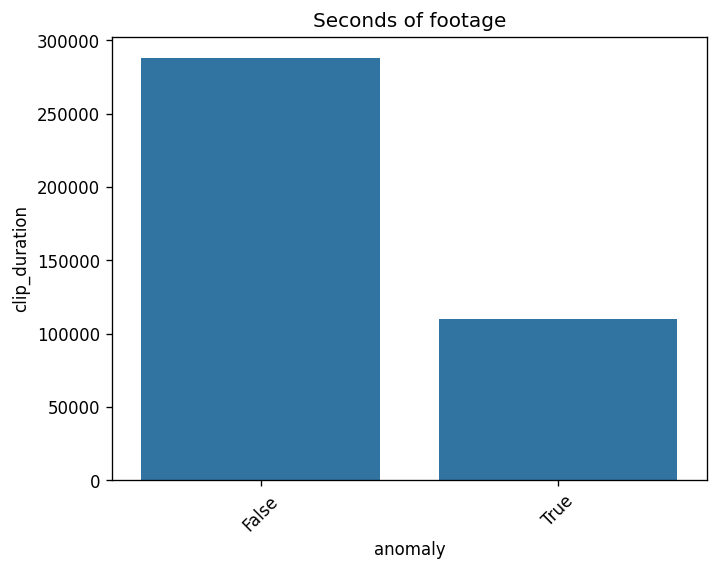

In [46]:
plot_bars(data=df.groupby('anomaly').sum()['clip_duration'], title='Seconds of footage')

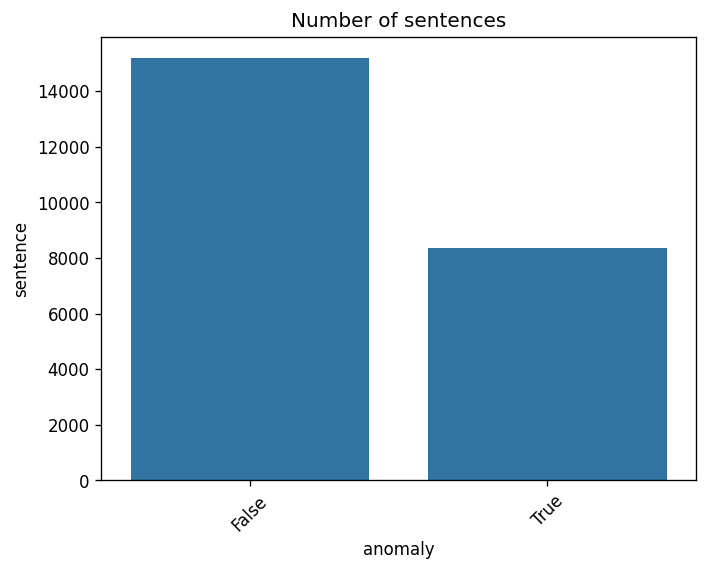

In [47]:
plot_bars(data=df.groupby('anomaly').count()['sentence'], title='Number of sentences')

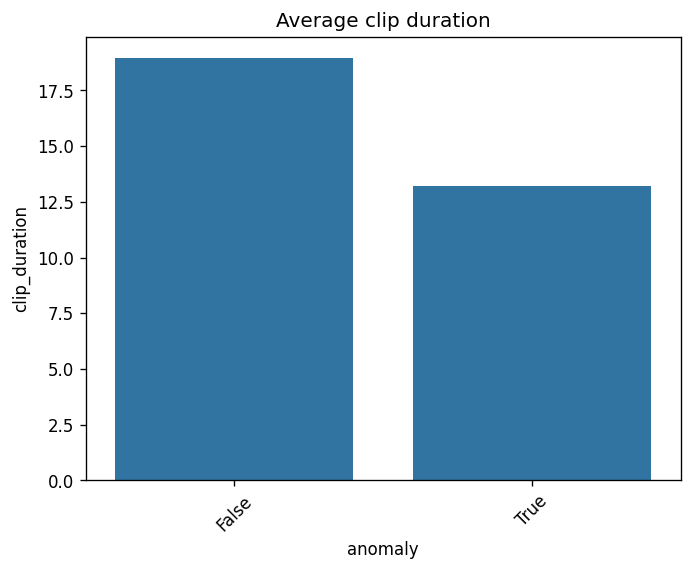

In [48]:
avg_clip_data = df.groupby('anomaly').sum()['clip_duration']/df.groupby('anomaly').count()['clip_duration']

plot_bars(data=avg_clip_data, title='Average clip duration')

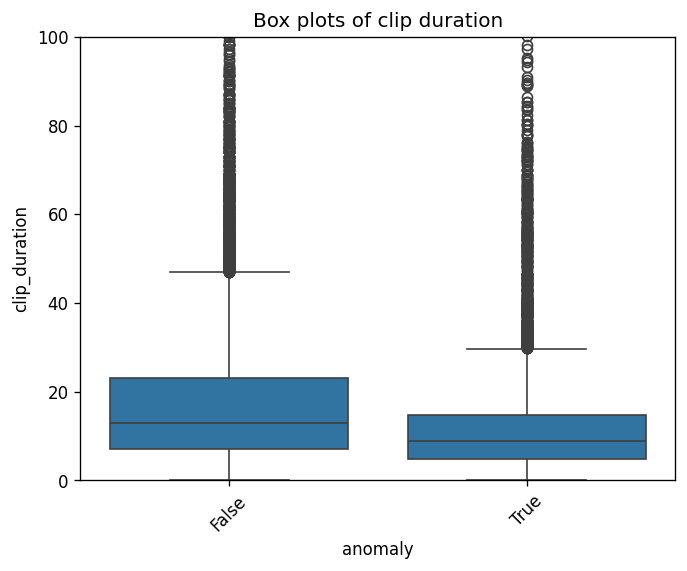

In [49]:
plot_boxes(x='anomaly', y='clip_duration', data=df, title='Box plots of clip duration', y_lim=100)

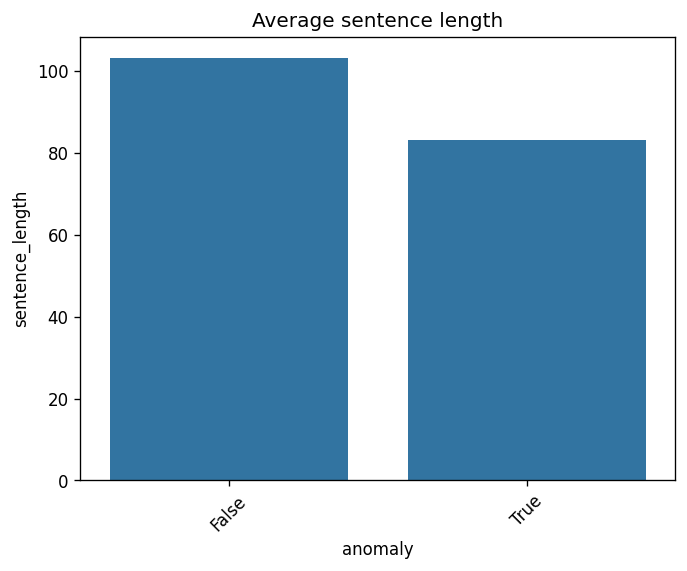

In [57]:
avg_sentence_data = df.groupby('anomaly').sum()['sentence_length']/df.groupby('anomaly').count()['sentence_length']

plot_bars(data=avg_sentence_data, title='Average sentence length')

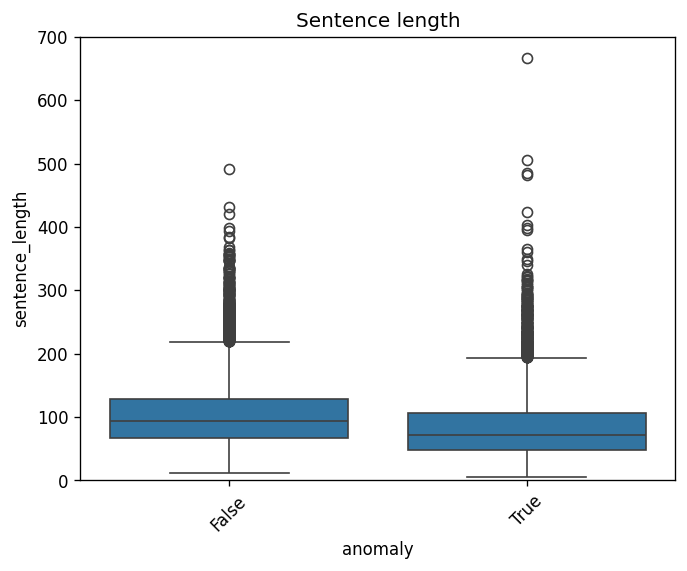

In [56]:
plot_boxes(x='anomaly', y='sentence_length', data=df, title='Sentence length', y_lim=700)

Let's see if there is any correlation between the clip duration and the sentence length.

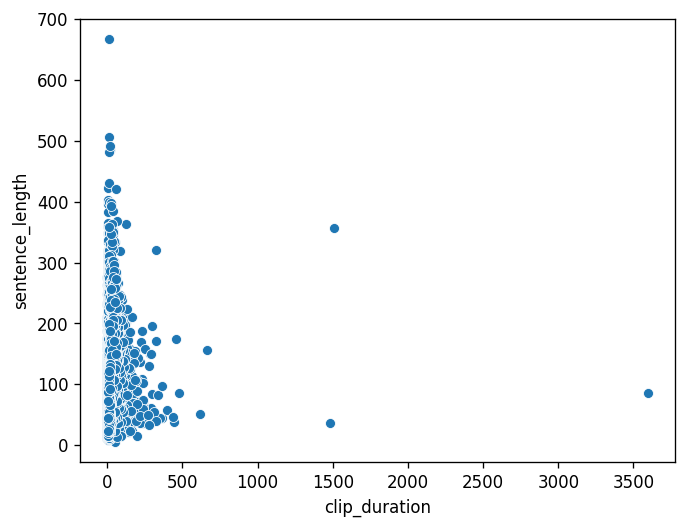

In [58]:
plt.figure(dpi=120)
sns.scatterplot(data=df, x='clip_duration', y='sentence_length')
plt.show()

In [63]:
df['sentence_length'].corr(df['clip_duration'])

0.07996337151666792

It seems that there isn't.

Now, let's plot the word clouds per each of the categories.

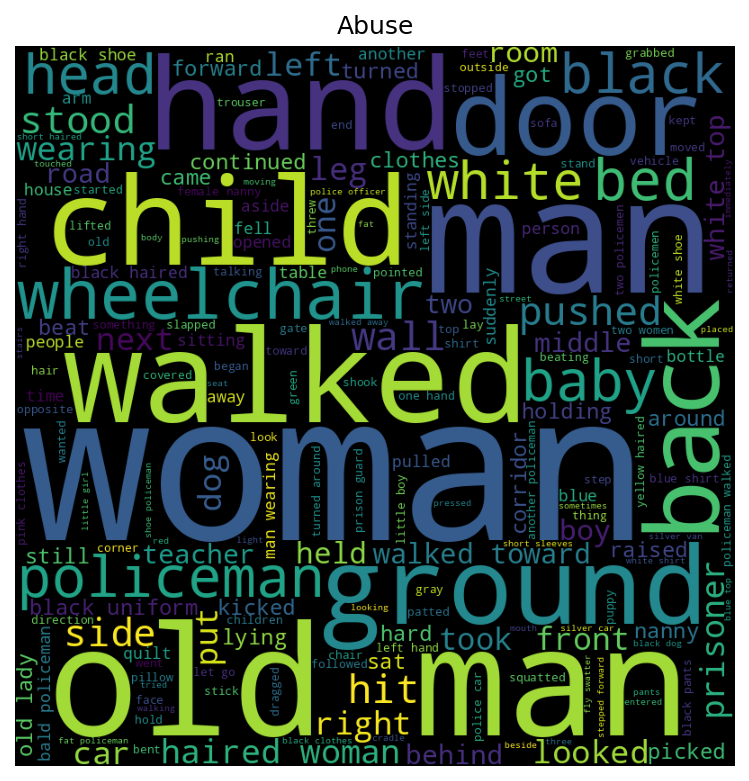

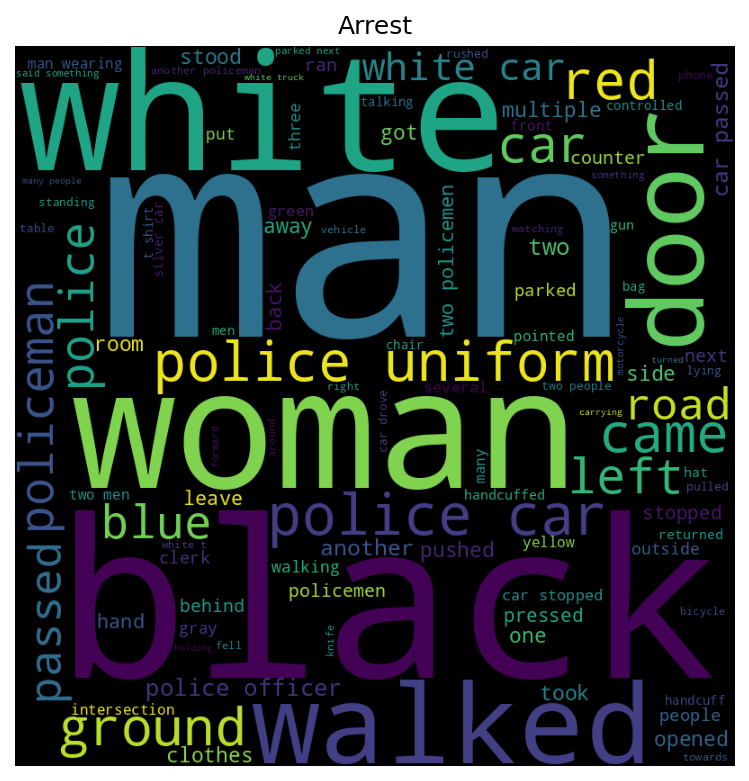

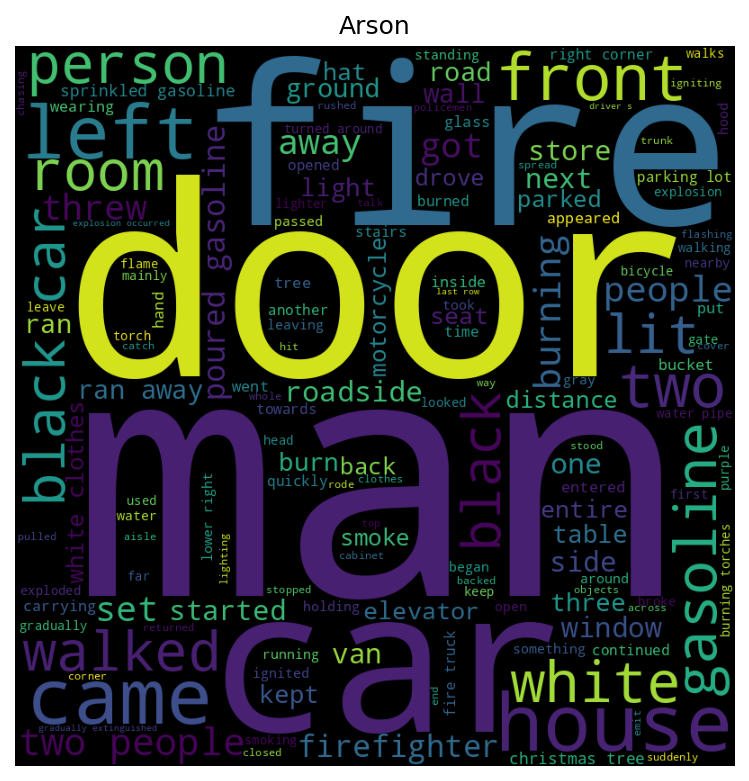

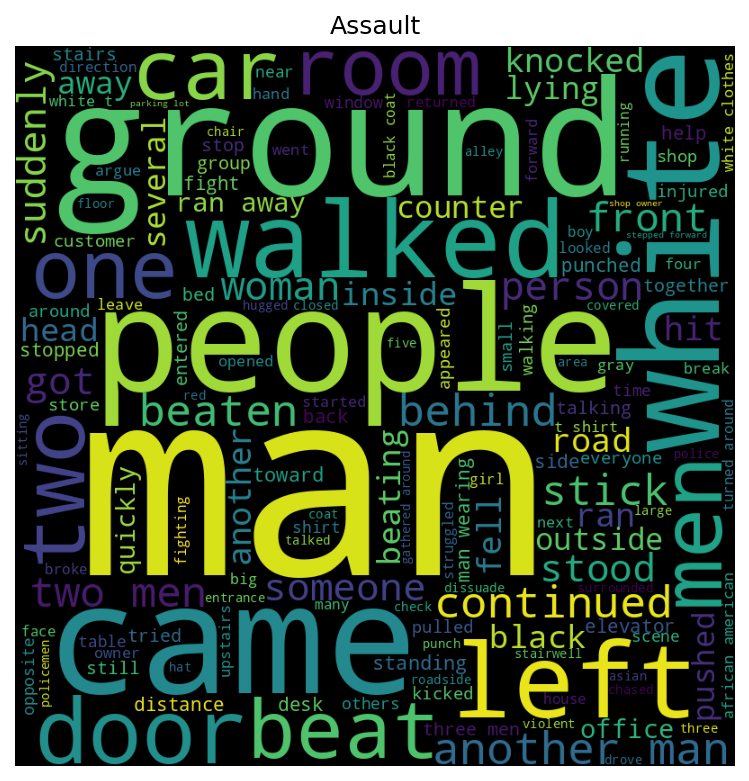

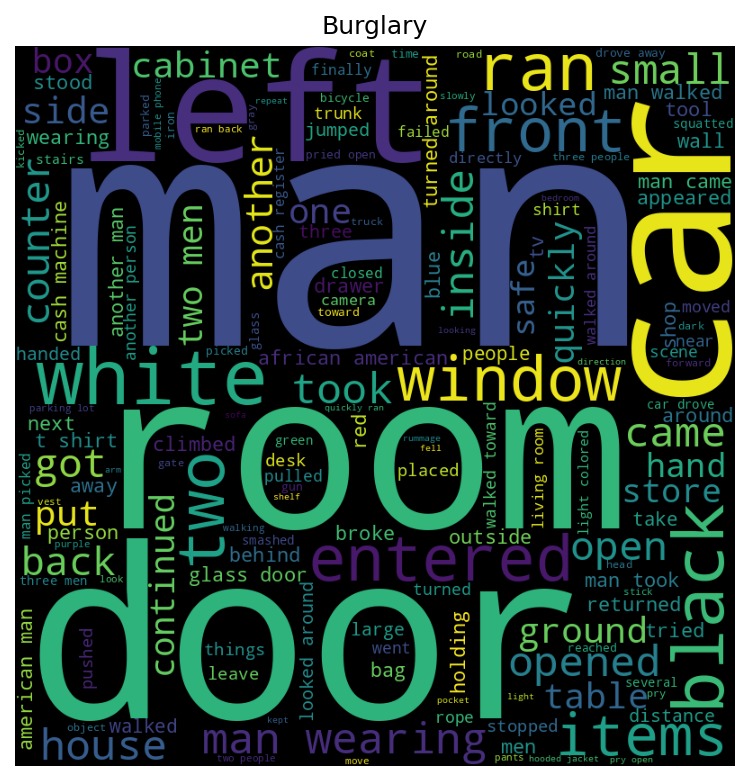

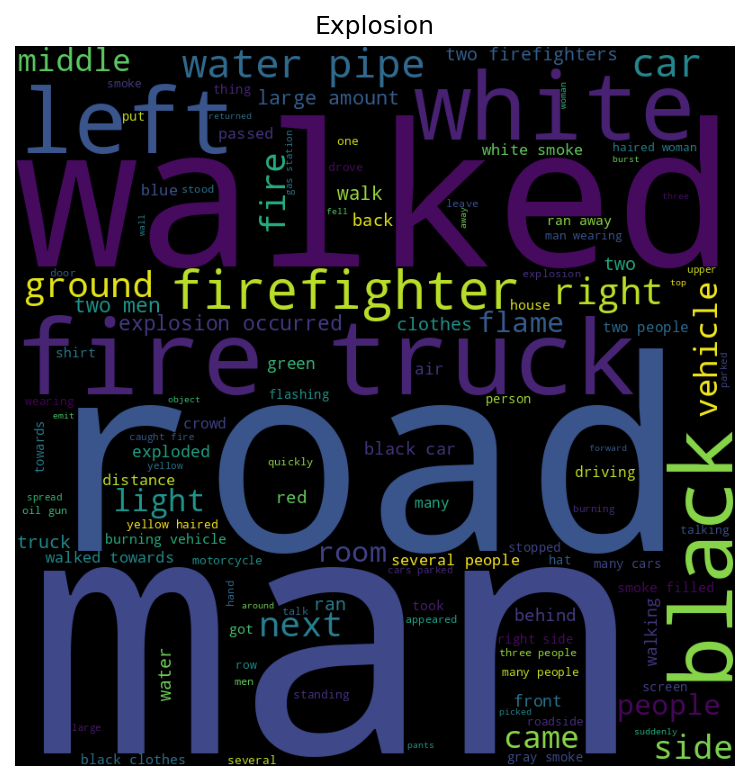

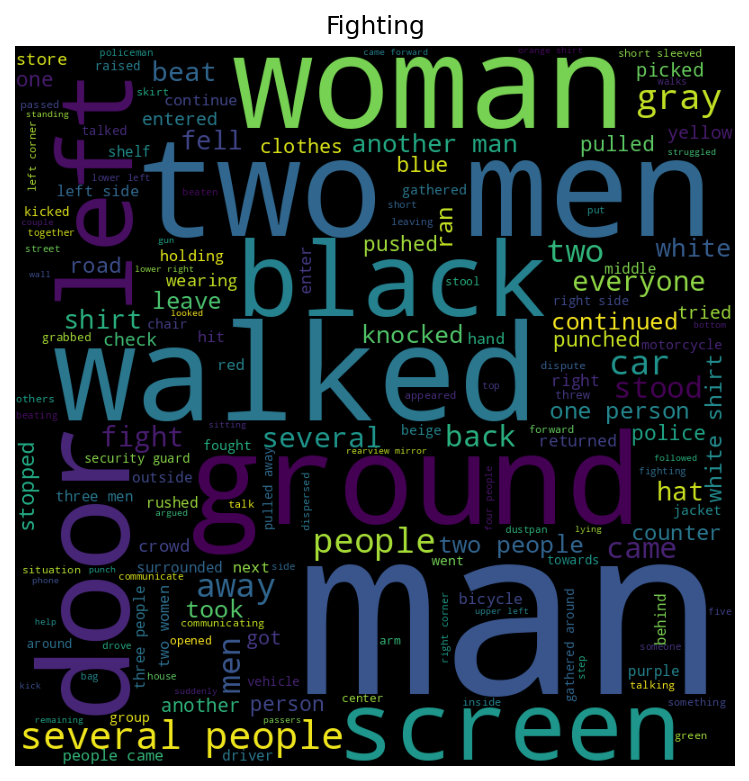

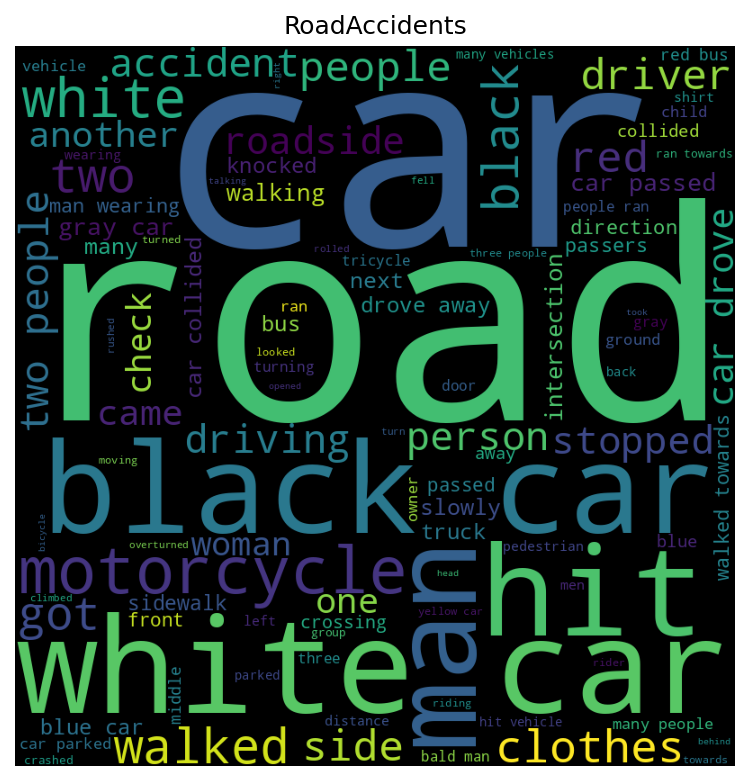

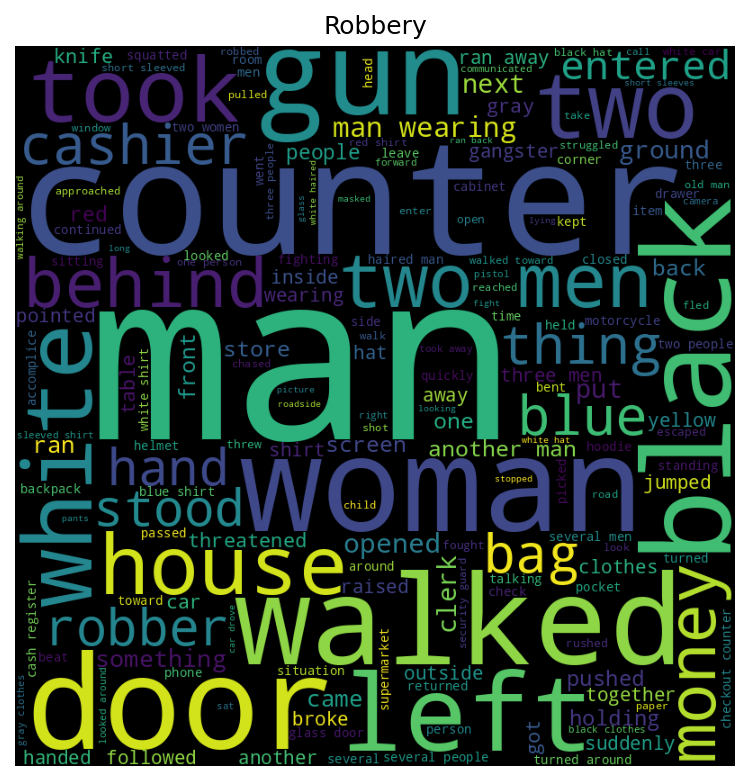

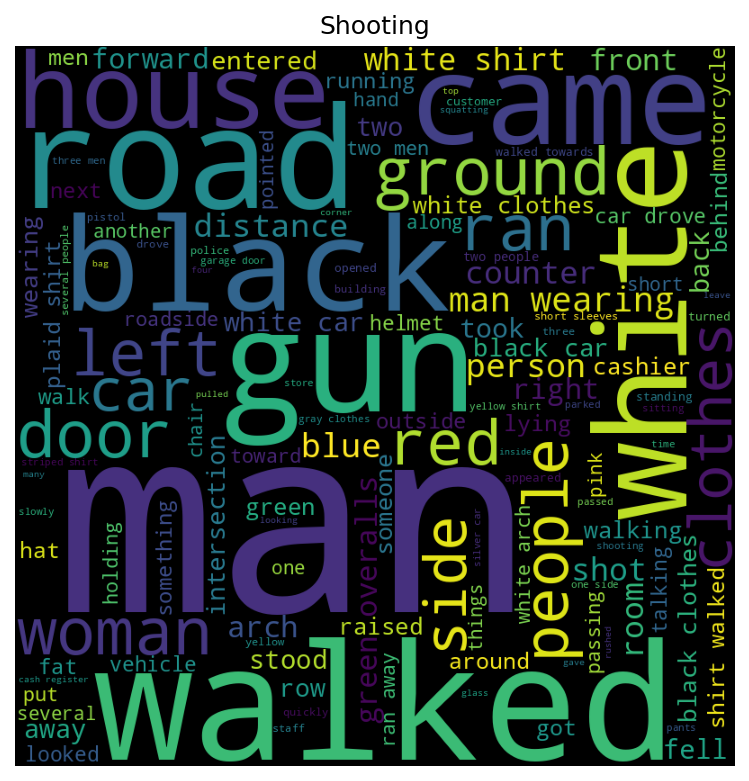

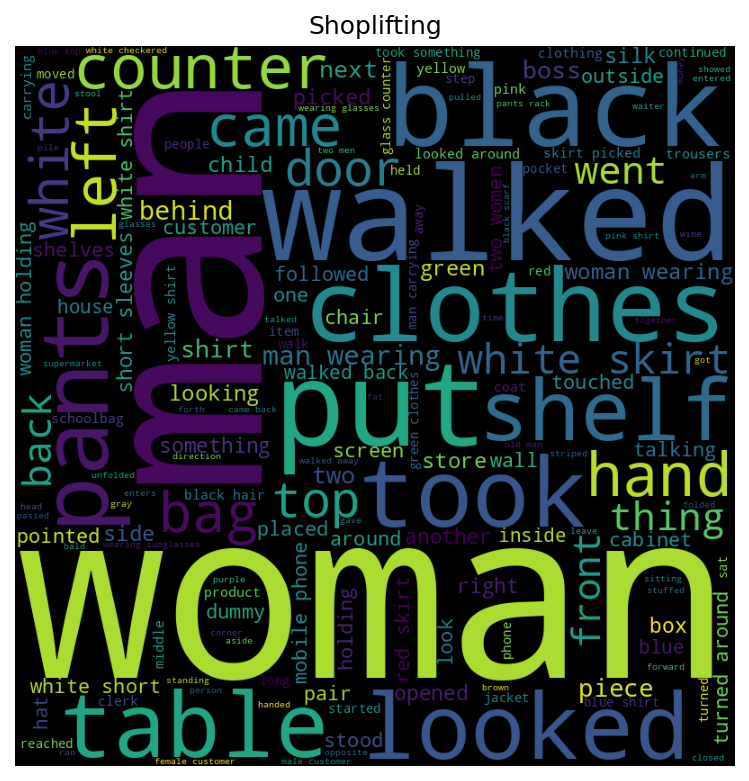

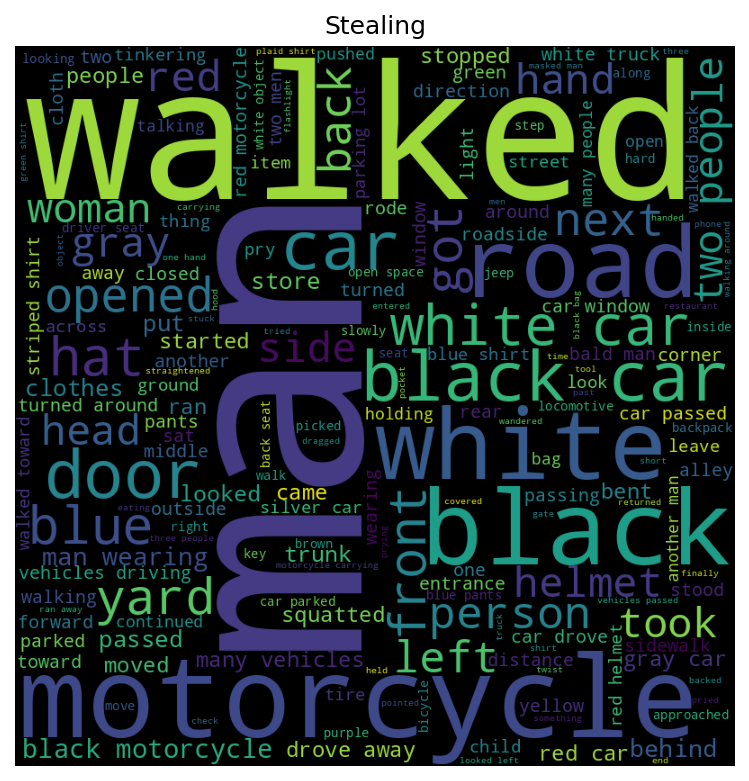

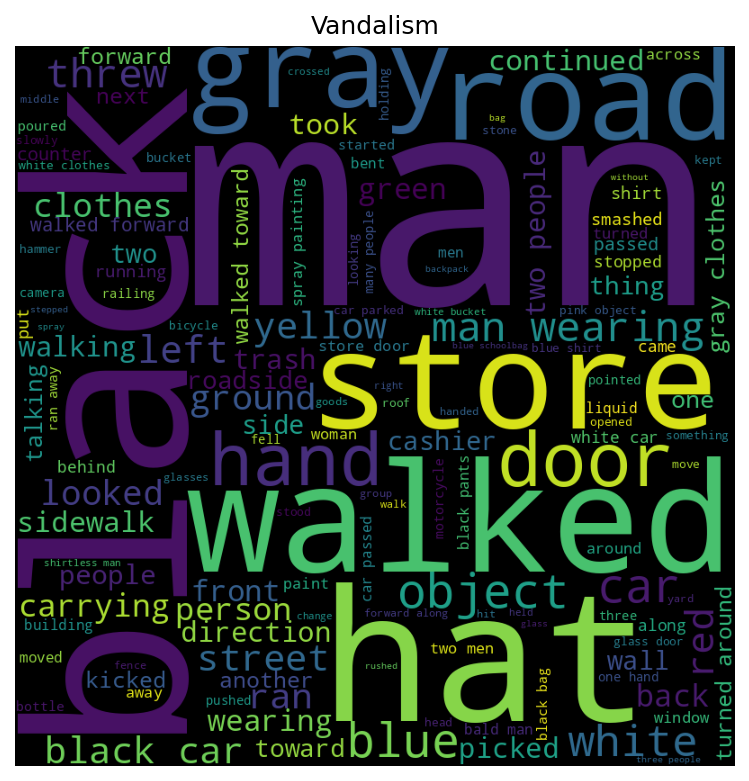

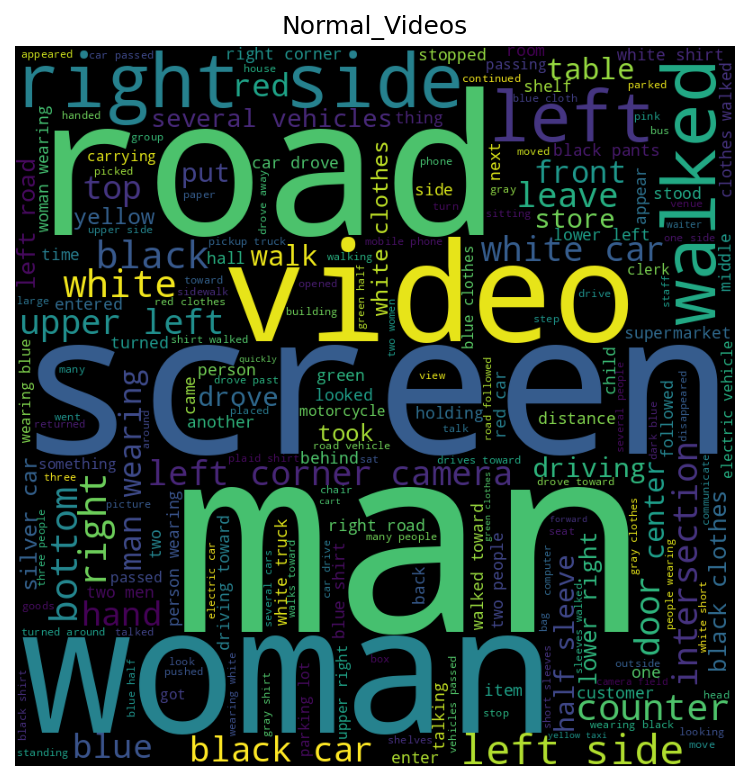

In [80]:
from wordcloud import WordCloud, STOPWORDS



def plot_wordcloud(data, title):
    comment_words = ''
    
    for sentence in data['sentence']:

        # Ensure sentence is string
        sentence = str(sentence)

        # Split the sentence in words or tokens
        tokens = sentence.split()

        # Prepare the tokens
        final_tokens = []        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            final_tokens.append(tokens[i])

        comment_words += " ".join(final_tokens)+" "

    # Get the wordcloud image
    wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='black',
                            stopwords = set(STOPWORDS),
                            min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(dpi=150)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)

    plt.show()

for class_name in df['class_name'].unique().tolist():
    plot_wordcloud(data=df[df['class_name'] == class_name], title=class_name)

Now the same for normal and abnormal videos.

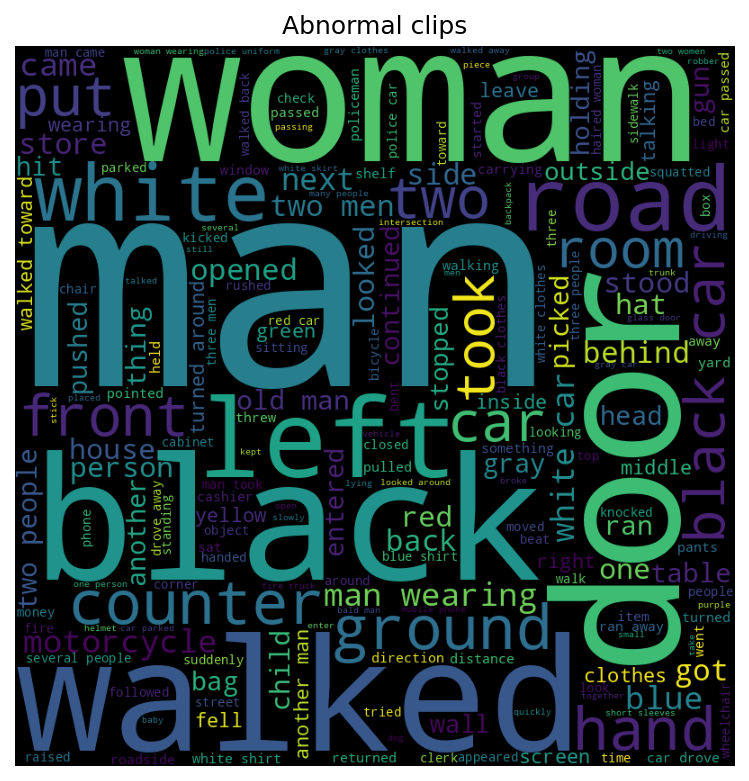

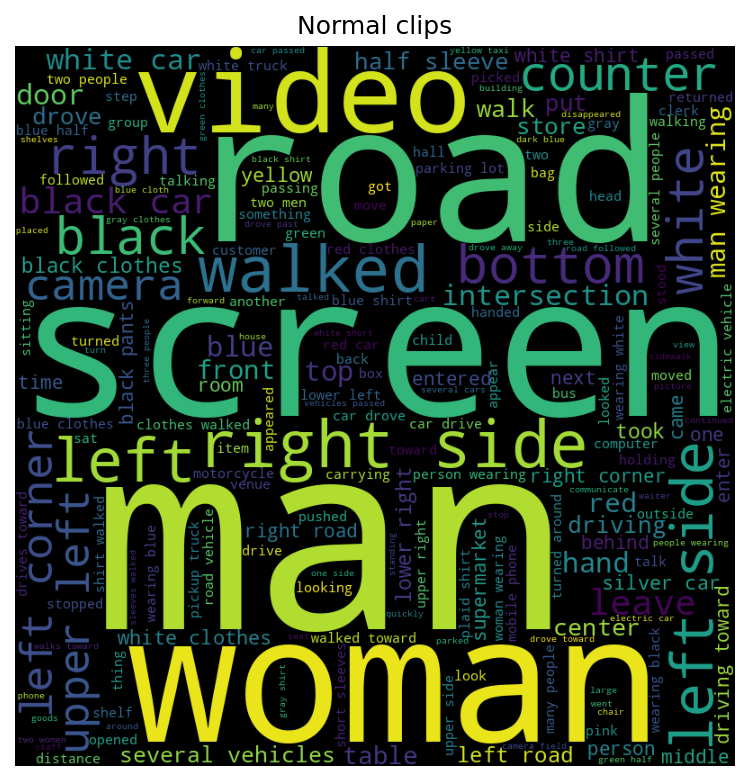

In [81]:
plot_wordcloud(data=df[df['anomaly']], title='Abnormal clips')
plot_wordcloud(data=df[df['anomaly'] == False], title='Normal clips')